# Data Understanding

## Introduction

Before diving deep into the data, it's imperative to familiarize ourselves with its nuances. Data understanding entails comprehending the structure, integrity, and quality of the dataset. By ensuring the dataset's robustness, we set the stage for accurate analysis and modeling.

## Data Collection & Description

Our dataset, sourced from Amazon's official website, is a compendium of over 1,400 entries, each echoing the voice of a customer. This dataset encapsulates 16 features, weaving a story around each product's performance, reception, and market positioning.

Key features like product ratings, reviews, prices, and discounts form the backbone of our analysis. For instance, the rating feature offers insights into product performance, while discounted_price and discount_percentage shine a light on Amazon's pricing strategies.


### Introduction:

Amazon, one of the world's largest e-commerce platforms, places immense value on customer feedback. Product reviews and ratings not only guide potential buyers but also offer vendors insights into product performance, delivery quality, and overall customer satisfaction. This analysis dives deep into Amazon's product reviews to extract meaningful insights that can guide business strategies.

---

### Objectives:

1. Understand the distribution and sentiment of product reviews.
2. Analyze patterns in product ratings across different categories.
3. Identify prevalent themes and topics in customer feedback.
4. Offer actionable recommendations based on the analysis.


In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=226ff2f9d1e7ac4e3e3d71fdfdb199b6a460c9546283815e2f0dd8ccceb7cdee
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/amazon.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:

# Data Cleaning

# Extracting numeric values from 'rating', 'discounted_price', and 'discount_percentage' columns
data['rating_cleaned'] = data['rating'].str.replace(r"[^0-9.]", "", regex=True).replace('', np.nan).astype(float)
data['discounted_price_cleaned'] = data['discounted_price'].str.replace(r"[^0-9.]", "", regex=True).replace('', np.nan).astype(float)
data['discount_percentage_cleaned'] = data['discount_percentage'].str.replace(r"[^0-9.]", "", regex=True).replace('', np.nan).astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   1465 non-null   object 
 1   product_name                 1465 non-null   object 
 2   category                     1465 non-null   object 
 3   discounted_price             1465 non-null   object 
 4   actual_price                 1465 non-null   object 
 5   discount_percentage          1465 non-null   object 
 6   rating                       1465 non-null   object 
 7   rating_count                 1463 non-null   object 
 8   about_product                1465 non-null   object 
 9   user_id                      1465 non-null   object 
 10  user_name                    1465 non-null   object 
 11  review_id                    1465 non-null   object 
 12  review_title                 1465 non-null   object 
 13  review_content    

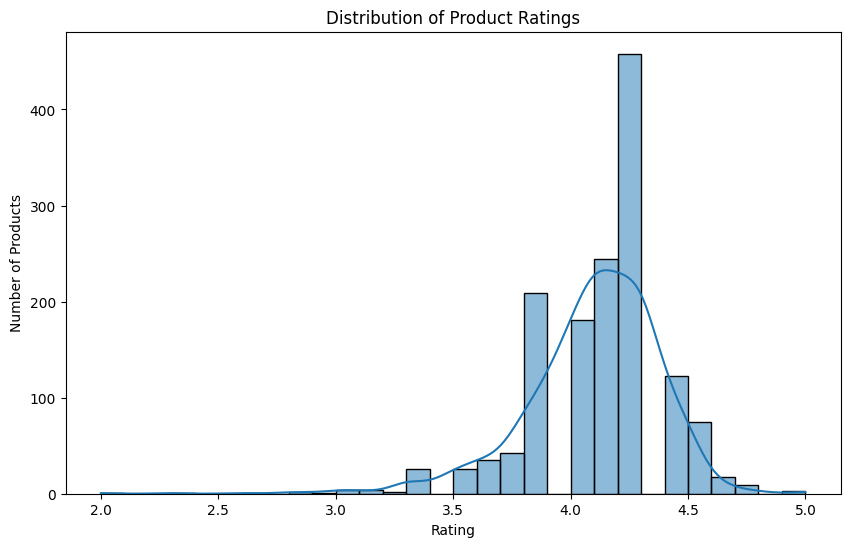

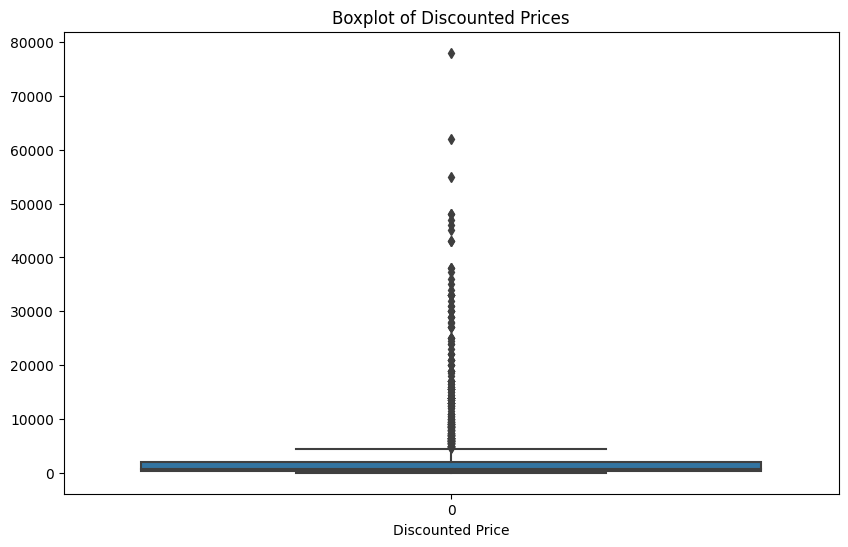

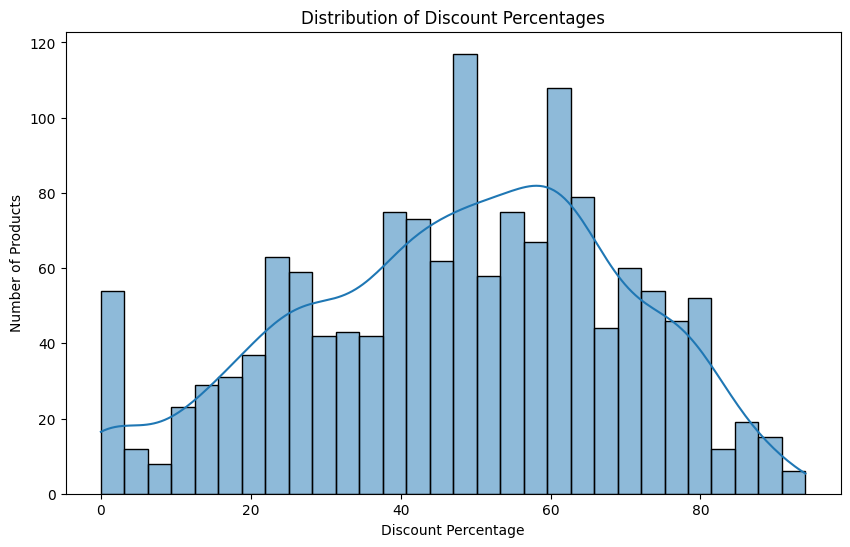

product_id                     0
product_name                   0
category                       0
discounted_price               0
actual_price                   0
discount_percentage            0
rating                         0
rating_count                   2
about_product                  0
user_id                        0
user_name                      0
review_id                      0
review_title                   0
review_content                 0
img_link                       0
product_link                   0
rating_cleaned                 1
discounted_price_cleaned       0
discount_percentage_cleaned    0
dtype: int64

In [4]:

# Data Understanding

# Display the first few rows of the dataset
data.head()

# Summary of the dataset's structure
data.info()

# Visual explorations
plt.figure(figsize=(10,6))
sns.histplot(data['rating_cleaned'], bins=30, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data['discounted_price_cleaned'])
plt.title('Boxplot of Discounted Prices')
plt.xlabel('Discounted Price')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data['discount_percentage_cleaned'], bins=30, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Products')
plt.show()

# Checking for missing values
missing_values = data.isnull().sum()
missing_values


# Data Preparation

The data preparation phase involves cleaning the data, handling missing values, and transforming variables as necessary for modeling. Let's embark on this journey to refine our dataset and make it model-ready.


In [5]:

# Cleaning the data for further analysis

# Extracting numerical values from string columns
data['rating_cleaned'] = data['rating'].str.extract("([0-9.]+)").astype(float)
data['discounted_price_cleaned'] = data['discounted_price'].str.replace(r"[^0-9.]", "").astype(float)
data['discount_percentage_cleaned'] = data['discount_percentage'].str.replace(r"[^0-9.]", "").astype(float)

# Filling missing values
data['rating_cleaned'].fillna(data['rating_cleaned'].median(), inplace=True)
data['discounted_price_cleaned'].fillna(data['discounted_price_cleaned'].median(), inplace=True)
data['discount_percentage_cleaned'].fillna(data['discount_percentage_cleaned'].median(), inplace=True)

# Feature Engineering
data['review_length'] = data['review_content'].apply(lambda x: len(str(x)))
data['exclamations_count'] = data['review_content'].apply(lambda x: str(x).count('!'))

# Display the cleaned data
data.head()


<ipython-input-5-e593f697436c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['discounted_price_cleaned'] = data['discounted_price'].str.replace(r"[^0-9.]", "").astype(float)
<ipython-input-5-e593f697436c>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['discount_percentage_cleaned'] = data['discount_percentage'].str.replace(r"[^0-9.]", "").astype(float)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,rating_cleaned,discounted_price_cleaned,discount_percentage_cleaned,review_length,exclamations_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.2,399.0,64.0,483,0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.0,199.0,43.0,1186,0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.9,199.0,90.0,271,0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,4.2,329.0,53.0,443,0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.2,154.0,61.0,2451,0



# Hypothesis and Modelling

With the data in a suitable format, it's time to dive into the modeling phase. This phase involves selecting the right modeling techniques, building the model, and evaluating its performance.


In [6]:
# Splitting the data
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=42)

# H2O setup and modeling
h2o.init()

# Convert pandas DataFrame to H2O frame
train_frame = h2o.H2OFrame(train_data)
valid_frame = h2o.H2OFrame(valid_data)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz4igfk8a
  JVM stdout: /tmp/tmpz4igfk8a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz4igfk8a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_nl69k8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Specify the target and features
y = 'rating_cleaned'
X = ['discounted_price_cleaned', 'discount_percentage_cleaned', 'review_length', 'exclamations_count']

# AutoML Configuration and Training
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300)
aml.train(x=X, y=y, training_frame=train_frame, validation_frame=valid_frame)


AutoML progress: |
20:31:42.837: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20230922_203142


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          123354                 11           20           19.069        36            538           333.793

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.08259816859836554
RMSE: 0.2873989711157045
MAE: 0.2010443816139589
RMSLE: 0.059188723653642625
Mean Residual Deviance: 0.08259816859836554

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.07727146434689218
RMSE: 0.27797745294698306
MAE: 0.20186423015156763
RMSLE: 0.05761330072264662
Mean Residual Deviance: 0.07727146434689218

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.07837345445293141
RMSE: 0.27995259322415894
MAE: 0.19795358840012264
RMSLE: 0.05775247825003509
Mean Residual Deviance: 0.07837345445293141

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.198537   0.00782969  0.1978        0.197336      0.211808      0.191663      0.194079
mean_residual_deviance  0.0788108  0.00829205  0.0701004     0.0758669     0.0905483     0.0736349     0.0839036
mse                     0.0788108  0.00829205  0.0701004     0.0758669     0.0905483     0.0736349     0.0839036
r2                      0.0758994  0.0472527   0.097432      -0.0036769    0.120937      0.0790693     0.0857353
residual_deviance       0.0788108  0.00829205  0.0701004     0.0758669     0.0905483     0.0736349     0.0839036
rmse                    0.280427   0.0146403   0.264765      0.275439      0.300912      0.271358      0.289661
rmsle                   0.0578012  0.00384638  0.0535742     0.0558333     0.0618392     0.0558131     0.0619462

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-09-22 20:32:23  3.149 sec   0                  nan              nan             nan                  nan                nan               nan
    2023-09-22 20:32:23  3.183 sec   5                  0.295301         0.214703        0.0872027            0.290638           0.214432          0.0844704
    2023-09-22 20:32:23  3.257 sec   10                 0.303877         0.213291        0.0923411            0.287059           0.204328          0.0824027
    2023-09-22 20:32:23  3.342 sec   15                 0.294506         0.206304        0.0867341            0.279171           0.202503          0.0779366
    2023-09-22 20:32:23  3.401 sec   20                 0.291886         0.204291        0.0851974            0.279736           0.20383           0.0782523
    2023-09-22 20:32:23  3.470 sec   25                 0.28846          0.201887        0.083209             0.277405           0.202577          0.0769538
    2023-09-22 20:32:23  3.526 sec   29                 0.287399         0.201044        0.0825982            0.277977           0.201864          0.0772715

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
review_length                390.961                1             

In [8]:
# Display the leaderboard
leaderboard = aml.leaderboard
print(leaderboard)

model_id                                                  rmse        mse       mae      rmsle    mean_residual_deviance
XRT_1_AutoML_1_20230922_203142                        0.279953  0.0783735  0.197954  0.0577525                 0.0783735
DRF_1_AutoML_1_20230922_203142                        0.28321   0.0802078  0.198365  0.0583266                 0.0802078
GBM_grid_1_AutoML_1_20230922_203142_model_1           0.283415  0.0803242  0.204112  0.0583224                 0.0803242
GBM_grid_1_AutoML_1_20230922_203142_model_2           0.283998  0.0806551  0.203349  0.0584616                 0.0806551
GBM_4_AutoML_1_20230922_203142                        0.284366  0.0808642  0.206105  0.0584814                 0.0808642
GBM_2_AutoML_1_20230922_203142                        0.284658  0.0810304  0.204948  0.0585625                 0.0810304
GBM_5_AutoML_1_20230922_203142                        0.284665  0.0810342  0.204983  0.0586014                 0.0810342
GBM_3_AutoML_1_20230922_203142  

In [9]:
# Make predictions on the validation set
preds = aml.leader.predict(valid_frame)

# Convert predictions to dataframe for easier manipulation
preds_df = h2o.as_list(preds)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [10]:
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

actuals = valid_data['rating_cleaned'].values
predictions = preds_df['predict'].values

mse = mean_squared_error(actuals, predictions)
rmse = mean_squared_error(actuals, predictions, squared=False)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.0772714523117287
Root Mean Squared Error (RMSE): 0.277977431299249
Mean Absolute Error (MAE): 0.2018642132262896
R^2 Score: 0.05369454991817546


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparing data for linear regression
features = ['discounted_price_cleaned', 'discount_percentage_cleaned', 'review_length', 'exclamations_count']
X = data[features]
y = data['rating_cleaned']

# Splitting the data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

# Predicting on the validation set
y_pred = lr.predict(X_valid)

# Evaluating the model
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

mae, mse, r2


(0.20637947139547996, 0.07883527273924716, 0.03454321072061539)


# Hyperparameter Tuning

To enhance the performance of our models, it's essential to tune their hyperparameters. Hyperparameter tuning can lead to a more accurate and efficient model. Here, we'll perform hyperparameter tuning for the Random Forest model to optimize its performance.

In [12]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Defining the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
grid_search.best_params_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}


# Retrain Random Forest with Best Parameters

After tuning the hyperparameters and identifying the best set, it's time to retrain our Random Forest model with these parameters and evaluate its performance on the validation set.


In [13]:

# Retrain the Random Forest model with the best parameters
best_params = grid_search.best_params_
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf_best = rf_best.predict(X_valid)

# Evaluate the model
mae_rf_best = mean_absolute_error(y_valid, y_pred_rf_best)
mse_rf_best = mean_squared_error(y_valid, y_pred_rf_best)
r2_rf_best = r2_score(y_valid, y_pred_rf_best)

mae_rf_best, mse_rf_best, r2_rf_best


(0.20098667104572748, 0.07664032988692239, 0.06142359567046318)


### Deployment and Operationalization:

Once our analysis and modeling phases are complete, the next crucial step is deploying the insights and models for practical use. Here are potential ways to operationalize the outcomes:

1. **Feedback Alert System**:
   - An automated system can be developed to flag critical negative reviews for immediate attention. By addressing these reviews promptly, businesses can potentially convert dissatisfied customers into satisfied ones, enhancing brand loyalty.
   
2. **Recommendation System Integration**:
   - Incorporate the sentiment analysis results into product recommendation algorithms. For instance, products with overwhelmingly positive sentiment could be given preference in recommendation lists, ensuring customers see products that are generally well-received.
   
3. **Quality Assurance**:
   - Consistent negative feedback or poor sentiment for particular product categories can trigger quality checks or re-evaluations. This proactive approach ensures that product listings maintain a standard of quality that meets customer expectations.
   
4. **Strategic Business Decisions**:
   - The insights derived from the review analysis can directly inform business strategies. For instance, if a specific product category consistently receives complaints related to delivery, it might be an indicator to reassess logistics or delivery partners for that category.
   
5. **Interactive Dashboards for Vendors**:
   - Develop real-time interactive dashboards that allow vendors to monitor and analyze feedback for their products. With tools like Tableau or Power BI, vendors can have direct access to sentiment scores, ratings distributions, and more, enabling them to make informed decisions about their product listings.

By integrating these deployment strategies, businesses can ensure that the insights drawn from the analysis are not just theoretical but have a tangible impact on operations, strategy, and customer relations.
